<a href="https://colab.research.google.com/github/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/blob/PredEval_PeriodoOsf/Modelo_predictivo_de_satisfacci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELO PREDICTIVO DE SATISFACCIÓN DE PROYECTO SOLIDARIO
---

Modelo clasificador que puede predecir el grado de satisfacción de estudiantes del Tecnológico de Monterrey en su experiencia realizando un proyecto solidario con una organización socio formadora.



Por: **Esteban Pérez. A00832329**. Instituto Tecnológico y de Estudios Superiores de Monterrey. (Junio, 2023)



## I. COMPRENSIÓN DEL NEGOCIO
---

#### **OBJETIVOS DE NEGOCIO**

**Objetivo general**

1. Predecir, para cada osf, el nivel de satisfacción en el siguiente periodo  (MODELO DE ML)


**Objetivos especificos**

1. Categorizar comentarios: Negativos, Neutros, Positivos
2. Rankear a osf con mejores niveles de satisfacción
3. Identificar a osf con peores niveles de satisfacción

#### **BENEFICIOS ESPERADOS**

* Identificar las características de las OSF mejor calificadas para promover la disponibilidad de más proyectos similares
* Ofrecer mejores proyectos solidarios a los alumnos del Tecnológico de Monterrey, Campus MOnterrey
* Conocer el grado de satisfacción de una OSF en el futuro


## II. COMPRENSIÓN DE LOS DATOS
---

### Descripción de variables

44 columnas:

* `periodoA`: Periodo académico
* `fechaInicio`: Fecha de inicio
* `fechaFin`: Fecha final
* `tipoRespuesta`: Tipo de respuesta
* `ip`: Dirección IP
* `progreso`: Progreso
* `duracion`: Duración (en segundos)
* `finalizado`: Finalizado
* `fechaRegistrada`: Fecha registrada
* `idRespuesta`: ID de respuesta
* `apellidoDest`: Apellido del destinatario
* `id`: ID
* `datRefExt`: Datos de referencia externos
* `latitud`: Latitud de ubicación
* `longitud`: Longitud de ubicación
* `canalDist`: Canal de la distribución
* `idioma`: Idioma del usuario
* `p1_a`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.
* `p1_b`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.
* `p1_c`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables
* `p1_e`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto
* `p1_f`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.
* `p1_g`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora
* `p1_h`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora
* `p1_i`: 1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)
* `p2`: 2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?
* `p3`: 3. ¿Consideras interesante la causa social del socio formador?
* `p4`: 4. Escribe algún comentario que te interese compartir con la organización socio formadora:
* `p5_a`: 5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad
* `p5_b`: 5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes
* `p5_c`: 5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos
* `p5_e`: 5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia
* `p6`: 6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:
* `p6.1`: 6.1 Tu comentario sobre la experiencia es:
* `osf`: Organización Socio Formadora
* `crn`: Número CRN
* `nombreExp`: Nombre de Experiencia
* `perdiodo`: Periodo
* `semana`: Semana
* `formato`: Tipo de Formato
* `matricula`: Matrícula con A0XXXXXXX:
* `osf_Proyecto`: Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:
* `nombreDest`: Nombre del destinatario
* `mailDest`: Correo electrónico del destinatario

### II.1 Librerías

In [1]:
!pip install sentiment_analysis_spanish
!pip install scikit-learn
!pip install sklearn

In [150]:
# Manejo y visualización de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Preprocesamiento
from sklearn.model_selection import train_test_split  # Separar datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Escalamiento
from imblearn.over_sampling import SMOTE  # Sobremuestreo
from imblearn.under_sampling import ClusterCentroids  # Submuestreo
from sentiment_analysis_spanish import sentiment_analysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
import warnings  # Ignorar alertas



# Modelos de aprendizaje supervisado
# Clasificación
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Modelos de aprendizae no supervisado
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc   # Dendrogram
from sklearn.decomposition import PCA

# Redes neuronales profundas
import keras
import keras.backend as kb
import tensorflow as tf

# Evaluación de modelos
from sklearn.metrics import *

# Deployment
import pickle


### II.2 Lectura de datos

#### II.2.1. Cargar todos los archivos csv

In [3]:
# Url de archivos csv
url1 = 'https://raw.githubusercontent.com/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/main/Encuesta%2Ba%2BEstudiantes%2BPS_17%2Bde%2Bmayo%2Bde%2B2023_12.05.csv'
url2 = 'https://raw.githubusercontent.com/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/main/Estudiantes%2BPS%2BFJ22%2BTEC21_17%2Bde%2Bmayo%2Bde%2B2023_12.17.csv'
url3 = 'https://raw.githubusercontent.com/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/main/Estudiantes%2BPS%2BAD22%2BTEC21_17%2Bde%2Bmayo%2Bde%2B2023_12.07.csv'
url4 = 'https://raw.githubusercontent.com/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/main/Estudiantes%2BPS_INV23%2BTEC21_17%2Bde%2Bmayo%2Bde%2B2023_12.22.csv'
url5 = 'https://raw.githubusercontent.com/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/main/Estudiantes%2BPS%2BFJ23_17%2Bde%2Bmayo%2Bde%2B2023_12.28.csv'


In [4]:
# Lectura de datos
df_inv22 = pd.read_csv(url1)
df_fj22 = pd.read_csv(url2)
df_ad22 = pd.read_csv(url3)
df_inv23 = pd.read_csv(url4)
df_fj23 = pd.read_csv(url5)

# Se eliminó previamente la primera fila del archivo csv porque
# repite el nombre de la columna pero en inglés

# Agregando una primera columna indicando el periodo académico
df_inv22.insert(0, 'PA', 'INV22')
df_fj22.insert(0, 'PA', 'FJ22')
df_ad22.insert(0, 'PA', 'AD22')
df_inv23.insert(0, 'PA', 'INV23')
df_fj23.insert(0, 'PA', 'FJ23')

#### II.2.2 Primer preprocesamiento de datos

##### 1. Unificación de datos

In [5]:
df_m = pd.concat([df_inv22, df_fj22, df_ad22, df_inv23, df_fj23])

##### 2. Renombramiento de columanas

In [6]:
renames = ['periodoA',
           'fechaInicio',
           'fechaFin',
           'tipoRespuesta',
           'ip',
           'progreso',
           'duracion',
           'finalizado',
           'fechaRegistrada',
           'idRespuesta',
           'apellidoDest',
           'id',
           'datRefExt',
           'latitud',
           'longitud',
           'canalDist',
           'idioma',
           'p1_a',
           'p1_b',
           'p1_c',
           'p1_e',
           'p1_f',
           'p1_g',
           'p1_h',
           'p1_i',
           'p2',
           'p3',
           'p4',
           'p5_a',
           'p5_b',
           'p5_c',
           'p5_e',
           'p6',
           'p6.1',
           'osf',
           'crn',
           'nombreExp',
           'periodo',
           'semana',
           'formato',
           'matricula',
           'osf_Proyecto',
           'nombreDest',
           'mailDest'
          ]
for i,r in enumerate(renames):
    #print(f'{i}: {r}')
    df_m.rename(columns={df_m.columns[i]: r}, inplace=True)

##### 3. Reordenamiento de columnas

In [7]:
reorder = ['periodoA',

           'osf',
           'osf_Proyecto',
           'nombreExp',
           'crn',

           'periodo',
           'semana',
           'formato',

           'fechaInicio',
           'progreso',
           'duracion',
           'finalizado',
           'fechaFin',
           'fechaRegistrada',

           'id',
           'idRespuesta',
           'tipoRespuesta',
           'idioma',
           'ip',
           'matricula',
           'latitud',
           'longitud',

           'nombreDest',
           'apellidoDest',
           'mailDest',

           'datRefExt',
           'canalDist',

           'p1_a',
           'p1_b',
           'p1_c',
           'p1_e',
           'p1_f',
           'p1_g',
           'p1_h',
           'p1_i',
           'p2',
           'p3',
           'p4',
           'p5_a',
           'p5_b',
           'p5_c',
           'p5_e',
           'p6',
           'p6.1',

          ]
df_m = df_m.reindex(columns=reorder)

In [8]:
df_m.columns

Index(['periodoA', 'osf', 'osf_Proyecto', 'nombreExp', 'crn', 'periodo',
       'semana', 'formato', 'fechaInicio', 'progreso', 'duracion',
       'finalizado', 'fechaFin', 'fechaRegistrada', 'id', 'idRespuesta',
       'tipoRespuesta', 'idioma', 'ip', 'matricula', 'latitud', 'longitud',
       'nombreDest', 'apellidoDest', 'mailDest', 'datRefExt', 'canalDist',
       'p1_a', 'p1_b', 'p1_c', 'p1_e', 'p1_f', 'p1_g', 'p1_h', 'p1_i', 'p2',
       'p3', 'p4', 'p5_a', 'p5_b', 'p5_c', 'p5_e', 'p6', 'p6.1'],
      dtype='object')

### II.3 Descripción de los datos

#### II.3.1 Previsualización del dataset

In [9]:
df_m.head()

,periodoA,osf,osf_Proyecto,nombreExp,crn,periodo,semana,formato,fechaInicio,progreso,...,p1_i,p2,p3,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1
0,INV22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22/04/2021 13:24,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INV22,León Ortigosa ABP,NaN,NaN,26892.0,NaN,NaN,NaN,22/04/2021 17:35,100,...,\n5 Muy Satisfecho,Sí,Sí,Me gustó mucho la causa a la que se estaba apo...,4,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Es complicado conseguir colaboraciones en esto...,Reconocimiento
2,INV22,"Comenzar de Nuevo, A.C.",NaN,NaN,26918.0,NaN,NaN,NaN,22/04/2021 18:31,100,...,\n1 Nada Satisfecho,Sí,Sí,"Me gustó el servicio, pero me hubiera gustado ...",4,4,4,4,"Pues ojalá que ahora sí me valgan mis horas, n...",Reconocimiento
3,INV22,"Casa Paterna La Gran Familia, A.C.",NaN,NaN,26913.0,NaN,NaN,NaN,23/04/2021 04:47,100,...,4,Sí,Sí,Muchas gracias por el apoyo y la oportunidad d...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Lo único que me desagrado del servicio fue la ...,Área de oportunidad
4,INV22,"Programa de Acompañamiento de Servicio Social,...",NaN,NaN,26933.0,NaN,NaN,NaN,23/04/2021 07:45,100,...,\n5 Muy Satisfecho,Sí,Sí,¡Muchas gracias por la experiencia!,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Me gusto mucho la experiencia por la apertura ...,Reconocimiento


#### II.3.2 Dimensionalidad

In [10]:
print('Registros: ', df_m.shape[0])
print('Campos: ', df_m.shape[1])

Registros:  10499
Campos:  44


#### II.3.3 Descripción de variables

In [11]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10499 entries, 0 to 368
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   periodoA         10499 non-null  object 
 1   osf              5804 non-null   object 
 2   osf_Proyecto     4239 non-null   object 
 3   nombreExp        1792 non-null   object 
 4   crn              5804 non-null   float64
 5   periodo          1792 non-null   float64
 6   semana           1779 non-null   object 
 7   formato          1792 non-null   object 
 8   fechaInicio      10499 non-null  object 
 9   progreso         10499 non-null  int64  
 10  duracion         10499 non-null  int64  
 11  finalizado       10499 non-null  bool   
 12  fechaFin         10499 non-null  object 
 13  fechaRegistrada  10499 non-null  object 
 14  id               10499 non-null  object 
 15  idRespuesta      10499 non-null  object 
 16  tipoRespuesta    10499 non-null  object 
 17  idioma           10

### II.4 Exploración de los datos

#### II.4.1 Medidas estadísticas

##### A) Variables cuantitativas

In [12]:
v_cuantitativas = ['progreso', 'duracion', 'latitud', 'longitud']

for i,y in enumerate(v_cuantitativas):
    print(f'{i+1}: {y}')

1: progreso
2: duracion
3: latitud
4: longitud


In [13]:
df_m[v_cuantitativas].describe()

,progreso,duracion,latitud,longitud
count,10499.000000,1.049900e+04,10495.000000,10495.000000
mean,99.995428,8.582590e+03,24.995108,-99.212264
std,0.234194,5.214845e+04,4.066914,10.763758
min,88.000000,2.500000e+01,-37.828000,-123.133700
25%,100.000000,1.190000e+02,25.644897,-100.325800
50%,100.000000,1.900000e+02,25.654600,-100.311000
75%,100.000000,3.610000e+02,25.680200,-100.263100
max,100.000000,1.298823e+06,59.955000,144.966900


##### Variables cualitativas

In [14]:
v_cualitativas = list(df_m.columns)
for x in v_cuantitativas:
    v_cualitativas.remove(x)

# Remover columnas con 100% valores nulos para evitar errores
v_cualitativas.remove('nombreDest')
v_cualitativas.remove('mailDest')
v_cualitativas.remove('datRefExt')

for i,y in enumerate(v_cualitativas):
    print(f'{i+1}: {y}')

#'periodoA', 'crn', 'semana', 'formato', 'progreso', 'idioma'

1: periodoA
2: osf
3: osf_Proyecto
4: nombreExp
5: crn
6: periodo
7: semana
8: formato
9: fechaInicio
10: finalizado
11: fechaFin
12: fechaRegistrada
13: id
14: idRespuesta
15: tipoRespuesta
16: idioma
17: ip
18: matricula
19: apellidoDest
20: canalDist
21: p1_a
22: p1_b
23: p1_c
24: p1_e
25: p1_f
26: p1_g
27: p1_h
28: p1_i
29: p2
30: p3
31: p4
32: p5_a
33: p5_b
34: p5_c
35: p5_e
36: p6
37: p6.1


In [15]:
dict_mode = {}

for x in v_cualitativas:
    dict_mode[x] = df_m[x].mode()[0]
    #print(f'{x}: {df_m[x].mode()[0]}')


df_vCual = pd.DataFrame.from_dict(dict_mode, orient='index').rename(columns={0:'Mode'})

df_vCual['Valores diferentes'] = [len(df_m[x].value_counts()) for x in v_cualitativas]
df_vCual

,Mode,Valores diferentes
periodoA,INV22,5
osf,Dirección de Servicio Social,252
osf_Proyecto,"Proeducación IAP, Jóvenes Ayudando a Niñas y N...",479
nombreExp,Aprendamos Juntos: Tutor Académico Matématicas,237
crn,444.0,613
periodo,3.0,4
semana,01-mar,5
formato,Regular,1
fechaInicio,25/11/2021 10:17,8295
finalizado,True,2


#### II.4.2 EDA Univariado

##### A) Variables cuantitativas

In [16]:
print(df_m.columns)
v_cuantitativas

Index(['periodoA', 'osf', 'osf_Proyecto', 'nombreExp', 'crn', 'periodo',
       'semana', 'formato', 'fechaInicio', 'progreso', 'duracion',
       'finalizado', 'fechaFin', 'fechaRegistrada', 'id', 'idRespuesta',
       'tipoRespuesta', 'idioma', 'ip', 'matricula', 'latitud', 'longitud',
       'nombreDest', 'apellidoDest', 'mailDest', 'datRefExt', 'canalDist',
       'p1_a', 'p1_b', 'p1_c', 'p1_e', 'p1_f', 'p1_g', 'p1_h', 'p1_i', 'p2',
       'p3', 'p4', 'p5_a', 'p5_b', 'p5_c', 'p5_e', 'p6', 'p6.1'],
      dtype='object')


['progreso', 'duracion', 'latitud', 'longitud']

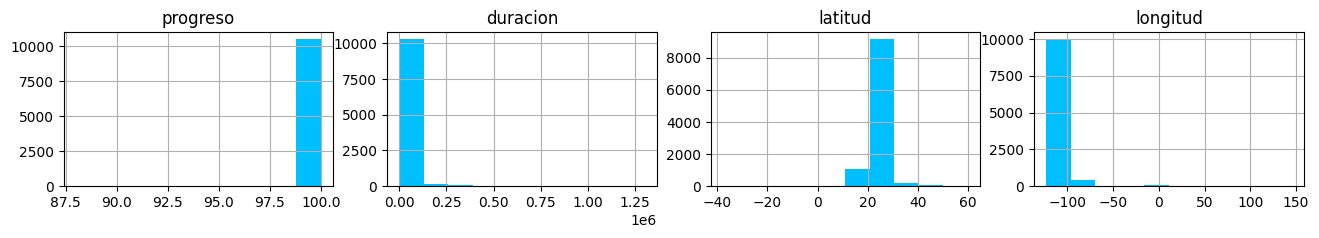

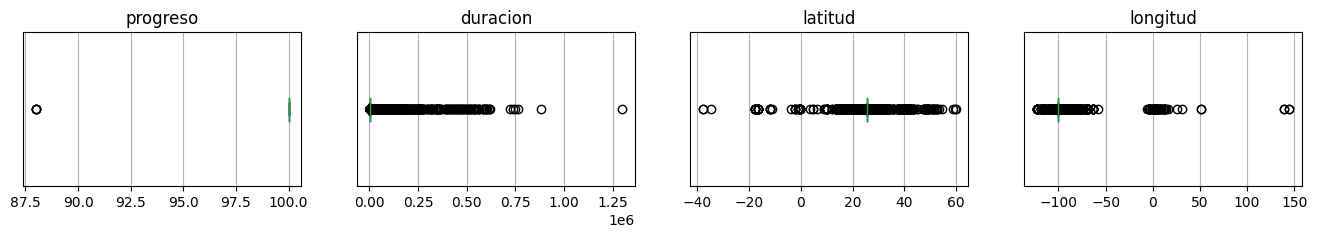

In [17]:
# Gráficos de barras
plt.subplots(1, 4, figsize=(16, 2))

for idx, i in enumerate(v_cuantitativas):
    plt.subplot(1, 4, idx+1)
    plt.hist(df_m[i], color='deepskyblue')
    plt.title(i)
    plt.grid(True)


# Gráficos de caja
plt.subplots(1, 4, figsize=(16.5, 2))

for idx, i in enumerate(v_cuantitativas):
    plt.subplot(1, 4, idx+1)
    pd.DataFrame(df_m[i]).boxplot(vert=False)

    plt.yticks([])
    plt.grid(True)
    plt.title(i)

#plt.tight_layout(pad = 0.5)
plt.show()

##### A) Variables cualitativas

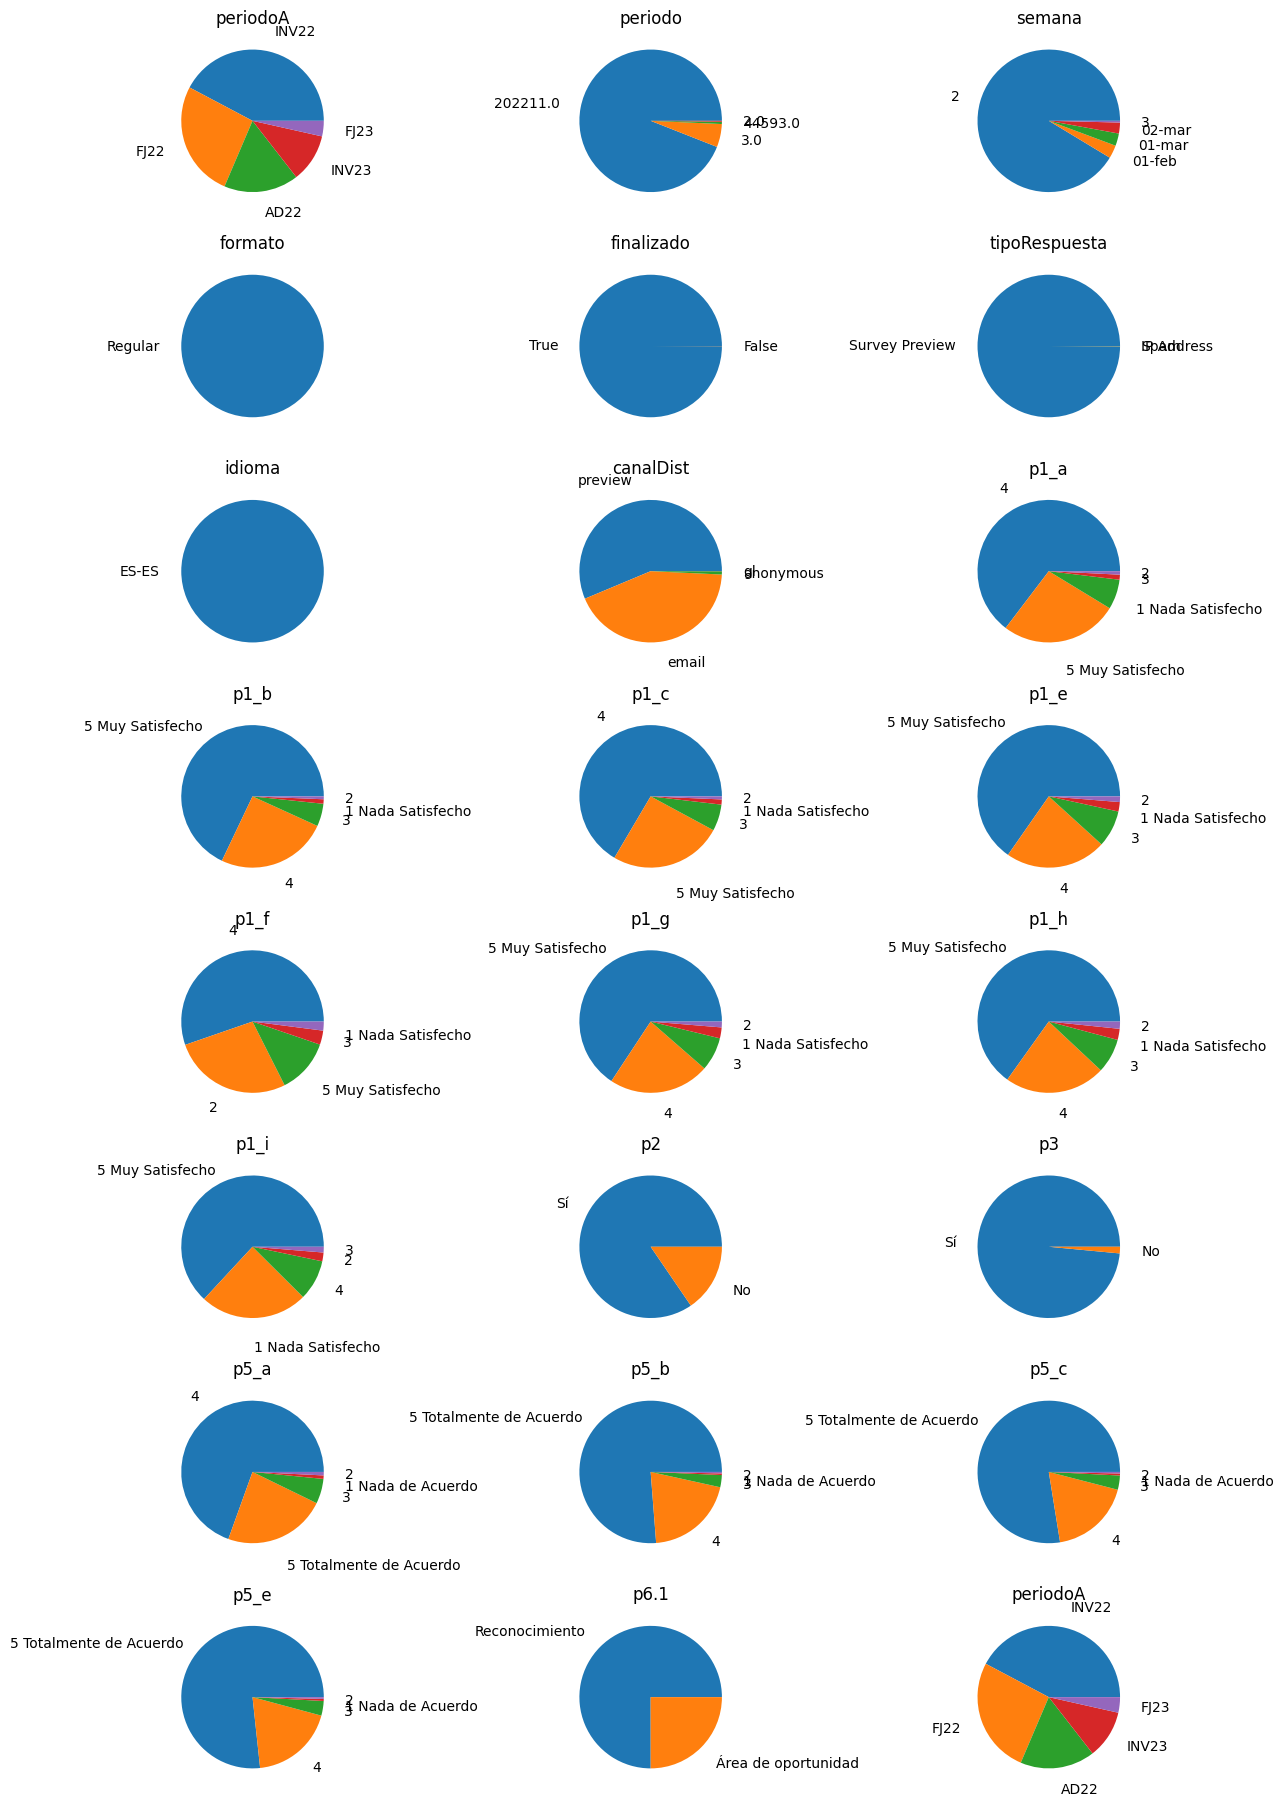

In [18]:
# Variables cualitativas con menos de 10 valores distintos
vc = []

for x in v_cualitativas:
    if (len(df_m[x].value_counts()) < 10):
        vc.append(x)



# Gráficos de pastel
plt.subplots(8, 3, figsize=(12, 18))

for idx, i in enumerate(vc):

    plt.subplot(8, 3, idx+1)
    plt.pie(df_m[i].dropna().value_counts(),
           labels=df_m[i].dropna().unique(),
           labeldistance=1.3)
    plt.title(i)

plt.subplot(8, 3, len(vc)+1)
plt.pie(df_m[vc[0]].dropna().value_counts(),
        labels=df_m[vc[0]].dropna().unique(),
        labeldistance=1.3)
plt.title(vc[0])

plt.tight_layout(pad = 0.5)
plt.show()

#### II.4.3 EDA Multivariado

##### A) Variables cuantitativas

In [19]:
df_m[v_cuantitativas].corr('pearson')\
.style.background_gradient(cmap='coolwarm',
                           axis=None).format(precision=2)

,progreso,duracion,latitud,longitud
progreso,1.00,0.00,nan,nan
duracion,0.00,1.00,-0.01,-0.01
latitud,nan,-0.01,1.00,0.10
longitud,nan,-0.01,0.10,1.00


### II.5 Verificación de calidad de los datos

#### II.5.1 Complitud

Obtener el porcentaje de valores nulos o faltantes por columna

In [20]:
pd.DataFrame(round(df_m.isnull().sum()/len(df_m)*100, 3))

,0
periodoA,0.000
osf,44.719
osf_Proyecto,59.625
nombreExp,82.932
crn,44.719
periodo,82.932
semana,83.056
formato,82.932
fechaInicio,0.000
progreso,0.000


#### II.5.2 Conformidad

Verificar si hay un mismo tipo de dato por columna

In [21]:
dict_c = {}

for col in df_m.columns:
    l = []
    for t in df_m[col].value_counts().index:
        l.append(type(t))

    dict_c[col] = set(l)

pd.DataFrame.from_dict(dict_c, orient='index').rename(columns={0:'Tipos de datos en columna'})

,Tipos de datos en columna
periodoA,<class 'str'>
osf,<class 'str'>
osf_Proyecto,<class 'str'>
nombreExp,<class 'str'>
crn,<class 'float'>
periodo,<class 'float'>
semana,<class 'str'>
formato,<class 'str'>
fechaInicio,<class 'str'>
progreso,<class 'int'>


#### II.5.3 Unicidad

Verificar si no hay registros repetidos

In [22]:
df_m[df_m.duplicated()]

,periodoA,osf,osf_Proyecto,nombreExp,crn,periodo,semana,formato,fechaInicio,progreso,...,p1_i,p2,p3,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1


## III. PREPARACIÓN DE LOS DATOS
---

**Preprocesamiento previo**

* Se eliminó el primer renglón en los cinco archivos para no tener el nombre de cada columna en inglés
* Se agregó a cada archivo una primera columna indicando el periodo académico al que pertenece
* Se unificaron los 5 archivos en uno solo, manteniendo todas las columnas de cada uno de ellos
* Se renombraron las columnas para tener títulos más cortos y representativos
* Se cambió el órden de las columnas para agruparlas por similitud


**Preprocesamiento siguiente**

1. Limpieza de datos:
* Eliminar columnas con un solo dato: idioma, tipo respuesta, finalizado
* Eliminar vaores nulos de columnas con más del 30% de valores nulos: nombreDest, mailDest, datRefExt

2. Transformación de datos:
* Eliminar columnas que no aportan información relevante
* Eliminar renglones que contengan solamente valores nulos en las columnas de la pregunta 1
* Transformar datos a valores numéricos enteros entre 1 y 5 en pregunta 1 y 53
* Transformar datos a valores booleanos en pregunta 24
* Convertir datos de texto de pregunta 6.1 a número binario
* Convertir variable de texto "periodoA" a variable entera
* Procesamiento de lenguaje natural (NLP) a preguntas 4 y 6
* Agregar columna evaluacion (variable objetivo)
* Balanceo de datos respecto a la variable objetivo
* Separar variables en






* Transformar texto a números entre 1 y 5 en columnas de la pregunta 1 y 5
* Transformar texto a variable binaria(entera entre 0 y 1) en columnas de la pregunta 2 y 3
* Unir columnas osf y osf_proyecto
* Agregar columna nombreExp a osf
* Convertir datos de texto de pregunta 6.1 a número binario
* SMOTE (para aumentar la muestra de la clase minoritaria / Oversampling) y  CusterCentroids (Para reducir la muestra de la clase mayoritaria / Undersampling)
* Normalizar los datos
* Crear nueva columna `evaluacion`. Ésta será a variable objetivo y se obtendrá al calcular el promedio de los valores numéricos de cada columna

### III.1 Limpieza de datos

In [23]:
df_l = df_m.copy()

##### 1. Eliminar columnas con un solo dato

In [24]:
df_l.drop(['progreso', 'duracion', 'formato', 'idioma', 'p3'], axis=1, inplace=True)

##### 2. Eliminar variables con más de 80% valores nulos

In [25]:
df_l.drop(['nombreDest', 'mailDest', 'datRefExt', 'nombreExp'], axis=1, inplace=True)

### III.2 Transformación de datos

In [26]:
df_t = df_l.copy()

##### 1. Eliminar variables no relevantes

In [27]:
df_t.drop(['latitud', 'longitud', 'periodo', 'semana',
           'finalizado', 'tipoRespuesta', 'canalDist', 'crn',
           'fechaInicio', 'fechaFin', 'fechaRegistrada', 'id',
           'idRespuesta', 'ip', 'matricula', 'apellidoDest',
           'p1_c', 'p1_f'], axis=1, inplace=True)

In [28]:
pd.DataFrame(df_t.columns)

,0
0,periodoA
1,osf
2,osf_Proyecto
3,p1_a
4,p1_b
5,p1_e
6,p1_g
7,p1_h
8,p1_i
9,p2


##### 2. Eliminar renglones con unicamente valores nulos

In [29]:
df_t.dropna(subset=df_t.columns[3:9], inplace=True)

##### 3. Transformar datos a valores numéricos enteros entre 1 y 5 en pregunta 1 y 5

In [30]:
# Transformación en pregunta 1
for col in df_t.columns[3:9]:
    df_t[col] = df_t[col].apply(lambda x: int(re.search(r'\d+', x).group()))

In [31]:
# Transformación en pregunta 5
for col in df_t.columns[11:15]:
    df_t[col] = df_t[col].apply(lambda x: int(re.search(r'\d+', x).group()))

##### 4. Transformar datos a valores booleanos en pregunta 2

In [32]:
def boolCol(dato):
    if dato == 'Sí':
        return bool(1)
    else:
        return bool(0)

df_t['p2'] = df_t['p2'].apply((boolCol))

#df_t.to_excel('DataTransf.xlsx', engine='xlsxwriter')

##### 5. Convertir datos de texto de pregunta 6.1 a número binario

* 0: Área de oportunuidad
* 1 : Reconocimiento

In [33]:
def boolCol(dato):
    if dato == 'Reconocimiento':
        return bool(1)
    else:
        return bool(0)

df_t['p6.1'] = df_t['p6.1'].apply((boolCol))

##### 6. Convertir variable de texto "periodoA" a variable entera

Sustituir el valor de texto del periodo a un valor numérico:

* INV22: 0
* FJ22: 1
* AD22: 2
* INV23: 3
* FJ23: 4

In [34]:
df_t.periodoA.unique()

array(['INV22', 'FJ22', 'AD22', 'INV23', 'FJ23'], dtype=object)

In [35]:
for row in range(0, len(df_t)):
    if (df_t.iloc[row, 0] == 'INV22'):
        df_t.iloc[row, 0] = int(1)
    elif (df_t.iloc[row, 0] == 'FJ22'):
        df_t.iloc[row, 0] = int(2)
    elif (df_t.iloc[row, 0] == 'AD22'):
        df_t.iloc[row, 0] = int(3)
    elif (df_t.iloc[row, 0] == 'INV23'):
        df_t.iloc[row, 0] = int(4)
    elif (df_t.iloc[row, 0] == 'FJ23'):
        df_t.iloc[row, 0] = int(5)

df_t.periodoA = df_t.periodoA.apply(lambda x: int(x))

In [36]:
df_t.periodoA.unique()

array([1, 2, 3, 4, 5], dtype=int64)

##### 7. Columna descriptiva de la OSF

Se unen las columnas `osf` y `osf_proyecto` en una sola.

In [37]:
# Renombrar índices (del 0 al 10496)
df_t.index = list(range(0,len(df_t)))

In [38]:
# Pasar valores de columna osf_Proyecto a osf
df_t.iloc[6213:,1] = df_t.iloc[6213:, 2]

In [39]:
# Eliminar columna osf_Proyecto
df_t.drop('osf_Proyecto', axis=1, inplace=True)

In [40]:
df_t[df_t.osf == '']

,periodoA,osf,p1_a,p1_b,p1_e,p1_g,p1_h,p1_i,p2,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1


##### 7. Procesamiento de lenguaje natural (NLP) a preguntas 4 y 6

Para estas preguntas se realizará una tokenización del texto con base en un diccionario de palabras clave que nos darán un indicio acerca de si el comentario fue positivo o negativo

7.1 Limpieza y normalizacion del texto

Eliminar carácteres especiales, signos de puntuación, artículos, nexos y preposiciones

In [41]:
def preprocess(texto):
    # Convertir texto a string
    texto = str(texto)

    puntuacion = r'[,;.:¡!¿?@#$%&[\](){}<>~=+\-*/|\\_^`"\']'
    texto = re.sub(puntuacion, ' ', texto)

    # Todo a minúsculas
    texto = texto.lower()

    # Acentos
    texto = re.sub('á', 'a', texto)
    texto = re.sub('é', 'e', texto)
    texto = re.sub('í', 'i', texto)
    texto = re.sub('ó', 'o', texto)
    texto = re.sub('ú', 'u', texto)
    texto = re.sub('ü', 'u', texto)
    texto = re.sub('ñ', 'n', texto)

    return texto

In [42]:
df_nlp = df_t.copy()

In [43]:
# Aplicamos las tres etapas de preprocesamiento anterior
df_nlp.p4 = df_nlp.p4.apply(preprocess)

df_nlp.p6 = df_nlp.p6.apply(preprocess)

7.2 Análisis de sentimiento en columnas

Valores cercanos a cero significan connotaciones negativas y los cercanos a 1 connotaciones positivas

In [44]:
warnings.filterwarnings("ignore")  # Ignorar alarma

# Crear instancia de analizador de sentimiento
sas = sentiment_analysis.SentimentAnalysisSpanish()

In [45]:
# Aplicamos analizador a pregunta 4
for idx,w in enumerate(df_nlp.p4):
  df_nlp.loc[idx, 'p4'] = sas.sentiment(w)

# Aplicamos analizador a pregunta 6
for idx,w in enumerate(df_nlp.p6):
  df_nlp.loc[idx, 'p6'] = sas.sentiment(w)

#df_tokens.sort_values(by='sentimiento', ascending=False)

7.3 Discretizamos para convertir la variable continua a discreta:

* 0 = Comentario malo
* 2 = Comentario neutro
* 5 = Comentario bueno

In [46]:
# Discretizar pregunta 4
df_nlp.p4 = pd.cut(df_nlp.p4,
                   bins=[0, 0.15, 0.85, 1],
                       labels=[0, 2, 5],
                       include_lowest = True, right=True)

# Discretizar pregunta 6
df_nlp.p6 = pd.cut(df_nlp.p6,
                   bins=[0, 0.15, 0.85, 1],
                   labels=[0, 2, 5],
                   include_lowest = True, right=True)

#target_binned.value_counts()
# Cambiar tipo de dato de categórico a entero
df_nlp.p4 = df_nlp.p4.astype('int16')
df_nlp.p6 = df_nlp.p6.astype('int16')

In [47]:
df_nlp.p4.value_counts()

p4
0    5085
2    3547
5    1865
Name: count, dtype: int64

In [48]:
df_nlp.p6.value_counts()

p6
0    5464
2    4203
5     830
Name: count, dtype: int64

In [49]:
df_nlp.head(5)

,periodoA,osf,p1_a,p1_b,p1_e,p1_g,p1_h,p1_i,p2,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1
0,1,León Ortigosa ABP,4,5,5,5,5,5,True,0,4,5,5,5,0,True
1,1,"Comenzar de Nuevo, A.C.",4,4,4,4,4,1,True,0,4,4,4,4,0,True
2,1,"Casa Paterna La Gran Familia, A.C.",4,5,5,5,5,4,True,0,5,5,5,5,0,False
3,1,"Programa de Acompañamiento de Servicio Social,...",5,5,3,5,5,5,True,0,5,5,5,5,0,True
4,1,Casa Monarca Ayuda Humanitaria al Migrante A.B.P.,4,3,3,5,5,2,True,0,4,4,4,4,0,False


##### 8. Agregar columna categoria de OSF

Esta columna mostrará la categoría del proyecto de la OSF

8.1 Importamos una tabla eralizada manualmente que indica las categorías de cada una de las OSF y proyectos mencionados en el dataset



In [50]:
url6 = 'https://raw.githubusercontent.com/EstebanPerez25/ACD-Modelo_predictivo_de_satisfacion/TipoDeOsf/OSF.csv'

df_cat = pd.read_csv(url6)


In [51]:
df_cat.head(3)

,osf,clase
0,León Ortigosa ABP,ONG - Humanitaria
1,"Comenzar de Nuevo, A.C.",ONG - Humanitaria
2,"Casa Paterna La Gran Familia, A.C.",ONG - Humanitaria


8.2. Agregamos columna `categoria` al data frame utilizando la tabla anterior para asignar la categoría a cada renglón

In [52]:
df_categoria = df_nlp.copy()

In [53]:
# Función para asignar categorgoría a cada osf
def asignarCat(osf):
  for r in range(0, len(df_cat)):
    if (osf == df_cat['osf'][r]):
      return df_cat['clase'][r]


In [54]:
df_categoria.insert(2, "categoria", df_categoria.osf.apply(asignarCat))

In [55]:
df_categoria.head(3)

,periodoA,osf,categoria,p1_a,p1_b,p1_e,p1_g,p1_h,p1_i,p2,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1
0,1,León Ortigosa ABP,ONG - Humanitaria,4,5,5,5,5,5,True,0,4,5,5,5,0,True
1,1,"Comenzar de Nuevo, A.C.",ONG - Humanitaria,4,4,4,4,4,1,True,0,4,4,4,4,0,True
2,1,"Casa Paterna La Gran Familia, A.C.",ONG - Humanitaria,4,5,5,5,5,4,True,0,5,5,5,5,0,False


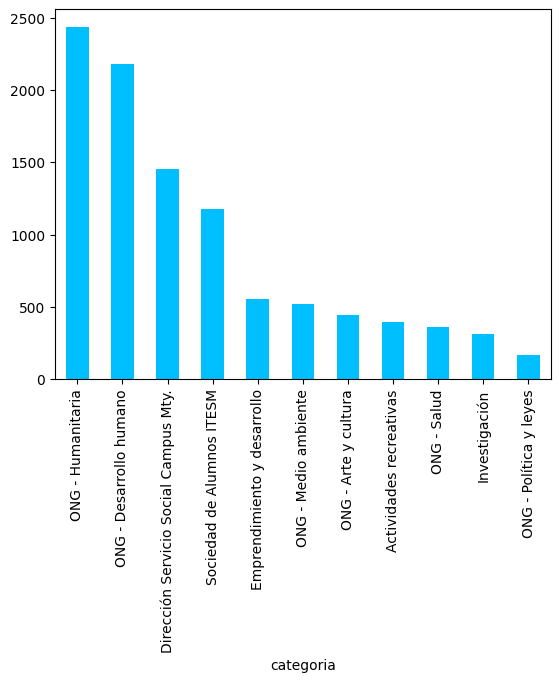

In [56]:
df_categoria.categoria.value_counts().plot.bar(color='deepskyblue');

##### 9. Agregar columna de evaluación

Esta corresponde a el promedio de los puntajes de las preguntas anteriores

In [57]:
df_eval = df_categoria.copy()

In [58]:
df_eval['evaluacion'] = 0

for r in range(0,len(df_eval)):
    df_eval.iloc[r, len(df_eval.columns)-1] = round((df_eval.iloc[r, 3:9].sum() +
                                           5*df_eval.iloc[r, 9] +
                                           df_eval.iloc[r, 10] +
                                           df_eval.iloc[r, 11:15].sum() +
                                           df_eval.iloc[r, 15] +
                                           5*df_eval.iloc[r, 16])/14)

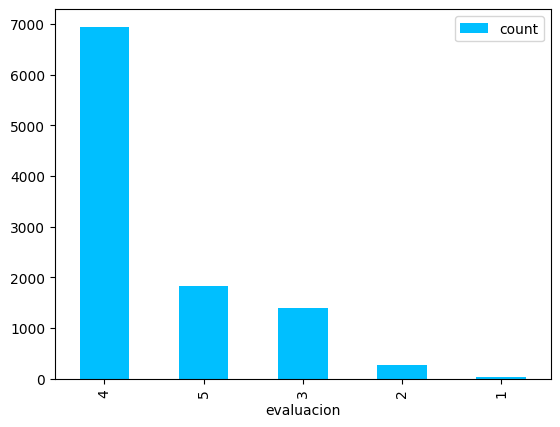

In [59]:
pd.DataFrame(df_eval.evaluacion.value_counts()).plot.bar(color='deepskyblue');

##### 10. Identificar palabras relevantes en los comentarios.

Aquí se pretende que obtener las palabras clave de los comentarios, por ejemplo, los adjetivos calificativos de los comentarios; o aquellas palabras con fuertes connotaciones positivas y negativas.


In [60]:
df_coment = df_eval.copy()

In [61]:
# Retomamos un data frame pasado para recuperar
# el texto de los comentarios
df_t.columns

Index(['periodoA', 'osf', 'p1_a', 'p1_b', 'p1_e', 'p1_g', 'p1_h', 'p1_i', 'p2',
       'p4', 'p5_a', 'p5_b', 'p5_c', 'p5_e', 'p6', 'p6.1'],
      dtype='object')

In [62]:
# Agregamos ambos campos de comentarios en una nueva columna
df_coment['comentarios'] = df_t.p4 + '. ' + df_t.p6

In [63]:
# Aplicamos las etapas de preprocesamiento
df_coment.comentarios = df_coment.comentarios.apply(preprocess)

In [64]:
# Tokenizamos el texto (dividirlo en palabras)
df_coment.comentarios = df_coment.comentarios.apply(lambda x: \
 [token for token in x.split()])

In [65]:
# Creamos una lista con todas las palabras, sin repetir
words = []

for row in range(0, len(df_coment)):
    words += df_coment.iloc[row, len(df_coment.columns)-1]

words = set(words)

print(f'Cantidad de palabras diferentes: {len(words)}')

Cantidad de palabras diferentes: 11849


In [66]:
# A cada palabra le asignamos un valor de acuerdo al
# análisis de sentimiento y lo guardamos en un dataframe
sa = {}

for word in words:
  sa[word] = sas.sentiment(word)

df_tokens = pd.DataFrame.from_dict(sa, orient='index').\
rename(columns={0:'sentimiento'}).\
sort_values(by='sentimiento', ascending=False)

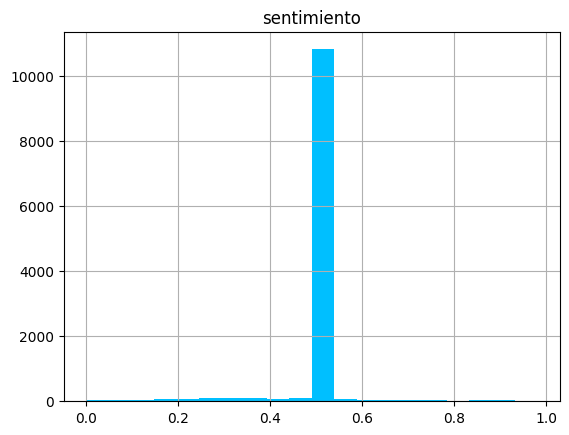

In [67]:
df_tokens.hist(bins=20, color='deepskyblue');

Observamos que la mayoría de las palabras son neutras, es decir, rondan el 0.5

In [68]:
#len([sas.sentiment(x) for x in df_coment.comentarios[0]])
# Solo dejaremos las palabras que relevantes
# (Las que tengan un valor de sentimiento dentro de un intervalo
def pRelevantes(lista):

    # Intervalo de palabras relevantes
    min = 0.3
    max = 0.7
    # Lista para almacenar palabras relevantes
    relevantes = []

    for x in lista:
    if ((sas.sentiment(x) < min) or (sas.sentiment(x) > max)):
        relevantes.append(x)

    return relevantes



#pRelevantes(df_coment.comentarios[475])

In [69]:
df_coment.comentarios = df_coment.comentarios.apply(pRelevantes)

In [70]:
df_coment.head(3)

,periodoA,osf,categoria,p1_a,p1_b,p1_e,p1_g,p1_h,p1_i,p2,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1,evaluacion,comentarios
0,1,León Ortigosa ABP,ONG - Humanitaria,4,5,5,5,5,5,True,0,4,5,5,5,0,True,4,"[se, actitud, estos, mejorar]"
1,1,"Comenzar de Nuevo, A.C.",ONG - Humanitaria,4,4,4,4,4,1,True,0,4,4,4,4,0,True,3,"[hubiera, mas, mas, mas, respecto, pues, ahora..."
2,1,"Casa Paterna La Gran Familia, A.C.",ONG - Humanitaria,4,5,5,5,5,4,True,0,5,5,5,5,0,False,4,"[dia, dia, falta, veces, no, no, falta, se, de..."


In [71]:
df_osf = pd.DataFrame(df_coment.osf.value_counts())

In [72]:
df_osf.head(5)

,count
osf,
Dirección de Servicio Social,621
Dirección de Servicio Social - Aprendizajes para todos,398
"Tierra de Artistas, A.C.",225
"SAIIS, Sociedad de Alumnos de Ingeniero Industrial y de Sistemas",183
"Proeducación IAP, Jóvenes Ayudando a Niñas y Niños_Tutorías para defender a la Educación",168


**Seleccionar a las OSF que están en los 5 perdiodos**

In [73]:
# Índices de cada OSF
osfs = df_coment.osf.unique()  # Lista de osf's

df_coment.osf[df_coment.osf == osfs[0]].index

dict_osf = {}  # Diccionario con nombre e índices de cada osf
for osf in osfs:
  dict_osf[osf] = df_coment.osf[df_coment.osf == osf].index

In [74]:
print(f'EJEMPLO\nOSF: {osfs[0]}.\nÍndices:{list(dict_osf[osfs[0]])}')

EJEMPLO
OSF: León Ortigosa ABP.
Índices:[0, 81, 82, 130, 234, 269, 285, 289]


In [75]:
#Identificamos a las osf que están en los 5 periodos
# Lista con osf que tienen presencia en los 5 periodos académicos
osf5 = []
# Diccionario con los periodos donde cada osf tiene presencia
dict_osfn = {}

for osf in osfs:
  periodos = set(df_coment.periodoA.iloc[dict_osf[osf]])
  dict_osfn[osf] = periodos



#pd.DataFrame.from_dict(dict_osfn, orient='index').rename(columns={0:'periodos'})

In [76]:
# Mostrar los osf que tienen presencia en 3 periodos
osf_3p = []  # Lista con nombres de las osf con presencia en 3 periodos
for x in osfs:
  if (len(dict_osfn[x]) == 3):
    print(f'-> {x} \n* Presencia en periodos: {dict_osfn[x]}\n')
    osf_3p.append(x)

-> Viccali, Vida con Calidad, A.C. 
* Presencia en periodos: {1, 2, 5}

-> Zamora Coaching INC, A.C. 
* Presencia en periodos: {1, 2, 5}

-> Fundación El Mundo Escribe, A.C. 
* Presencia en periodos: {1, 2, 5}

-> Comedor Infantil Mensajero de Paz - Esperanza al Débil, A.C. 
* Presencia en periodos: {1, 2, 5}

-> DIF Nuevo León 
* Presencia en periodos: {1, 2, 5}

-> CIDEPO, Centro de Investigación y Desarrollo de Políticas Públicas, A.C. 
* Presencia en periodos: {1, 2, 5}

-> VIFAC, Vida y Familia Monterrey, A.B.P. 
* Presencia en periodos: {1, 2, 5}

-> ANSPAC, Asociación Nacional Pro Superación Personal A.C. 
* Presencia en periodos: {1, 2, 5}

-> CONAFE, Consejo Nacional de Fomento Educativo 
* Presencia en periodos: {1, 2, 5}

-> AIESEC México, A.C. 
* Presencia en periodos: {1, 2, 5}

-> Inclusión y Accesibilidad 
* Presencia en periodos: {1, 2, 5}

-> Iniciativa Campana Altamira 
* Presencia en periodos: {1, 2, 5}

-> Familia de Santa María, A.C. 
* Presencia en periodos: {1, 2

In [77]:
# Cantidad de osf que tienen presencia en 1 a 5 periodos
for i in range(1, 6):
  suma = 0
  for x in osfs:
    if (len(dict_osfn[x]) == i):
      suma += 1
  print(f'{i} periodos: {suma} OSF\'s')

1 periodos: 598 OSF's
2 periodos: 80 OSF's
3 periodos: 19 OSF's
4 periodos: 0 OSF's
5 periodos: 0 OSF's


No hay OSF que tengan presencia en los 5 periodos, solamente en 1, 2 y 3. Por ello, aplicaremos los modelos de regresión a las OSF que tienen presencia en 3 periodos.

##### 10. Separar variables en dependiente e independiente

Trabajaremos en la **predicción de series de tiempo**, de tal forma que se logre el objetivo de predecir cuál será la calificación y comentarios en la encuesta del siguiente periodo académico, para cada uno de los OSF.

Para ello, sólo consideraremos las variables numéricas:

**Variables independientes:**
* `perdiodoA`
* `p1_a`
* `p1_b`
* `p1_e`
* `p1_g`
* `p1_h`
* `p1_i`
* `p2`
* `p4`
* `p5_a`
* `p5_b`
* `p5_c`
* `p5_e`
* `p6`
* `p6.1`

**Variable dependiente:**
* `evaluacion`

---
---
---
---


## IV. MODELACIÓN
---

En esta sección se seguirán las siguientes dos etapas


**A) Modelo de regresión para predecir series de tiempo del nivel de satisfacción**

Se elegirá el mejor de los siguientes modelos de regresión de aprendizaje supervisado capaz de **predecir la evaluación de cada OSF en un periodo académico futuro a los datos de entrenamiento**.

Los modelos a probar son los siguientes:

* Regresión lineal y/o Regresión polinómica
* Regresión con K-NN
* Regresión con Random Forest
* Regresión con Support Vector Machine (SVM)
* Regresión con redes neuronales

**B) Generación de nueva información a partir de los datos**
Se utilzarán modelos de aprendizaje no supervisado para las siguientes tareas:

* Identificar las variables más relevantes: Análisis de componentes principales (PCA)
* Identificar si los mejors osf tienen algo en común (K-Means y Clusterización)

**Descripción del set de datos (ABT)**

In [78]:
df_coment.describe()

,periodoA,p1_a,p1_b,p1_e,p1_g,p1_h,p1_i,p4,p5_a,p5_b,p5_c,p5_e,p6,evaluacion
count,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000
mean,2.165666,4.532628,4.588263,4.488711,4.492141,4.473754,4.460798,1.564161,4.599409,4.717538,4.723635,4.712489,1.196151,3.977613
std,1.188859,0.739193,0.695318,0.835390,0.841678,0.867401,0.840462,1.829505,0.702681,0.565246,0.577565,0.589243,1.465531,0.666727
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,4.000000,5.000000,5.000000,5.000000,0.000000,4.000000
50%,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,0.000000,4.000000
75%,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,2.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [79]:
len(df_coment.columns)

19

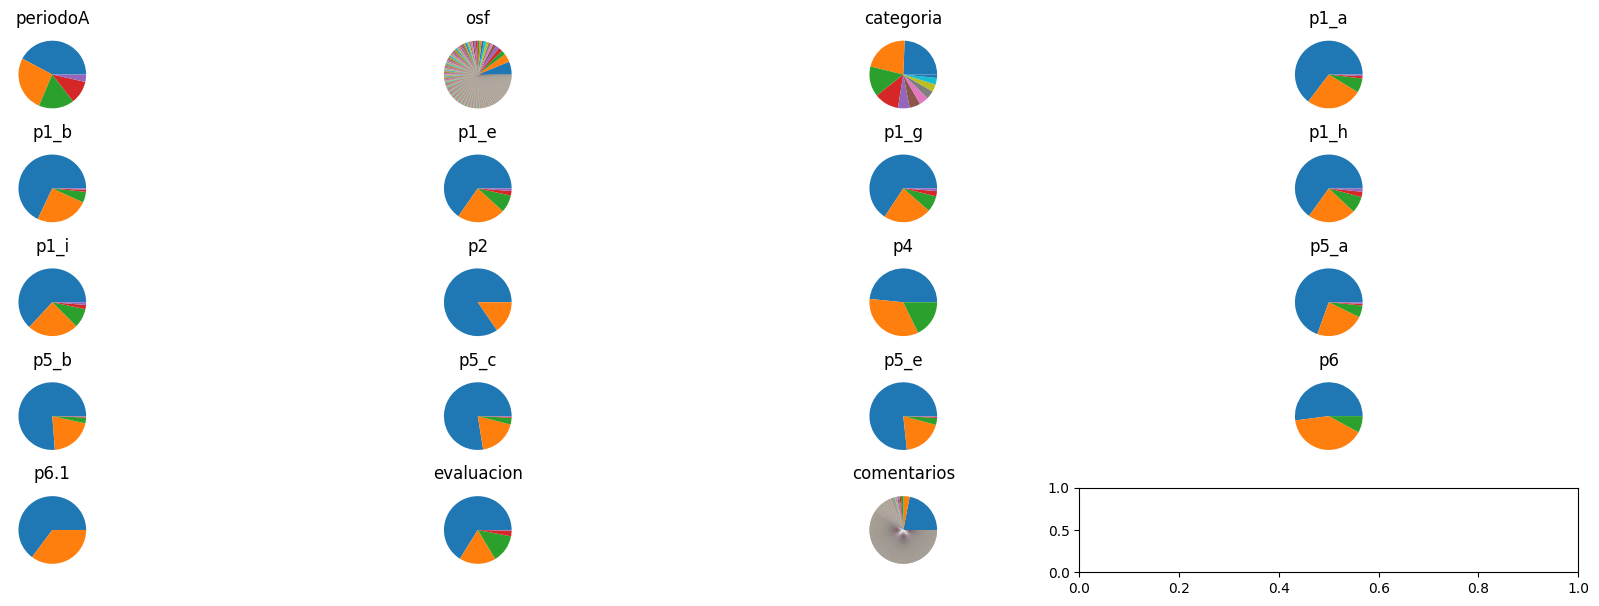

In [80]:
# 19 variables

# Gráficos de pastel
plt.subplots(5,  4, figsize=(18, 6))

for idx, i in enumerate(df_coment.columns):

  if (idx < len(df_coment.columns)):
    plt.subplot(5, 4, idx+1)
    plt.pie(df_coment[i].value_counts(),
           labels=None)

    plt.title(i)

  else:
    plt.axis('off')  # Ocultar los ejes del subplot 20

plt.tight_layout(pad = 0.5)
plt.show()

In [81]:
df_coment.corr('pearson', numeric_only=True)\
.style.background_gradient(cmap='coolwarm',
                           axis=None).format(precision=2)

,periodoA,p1_a,p1_b,p1_e,p1_g,p1_h,p1_i,p2,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1,evaluacion
periodoA,1.00,0.08,0.05,0.09,0.07,0.08,0.06,0.01,0.06,0.01,-0.00,-0.01,-0.00,0.04,0.04,0.07
p1_a,0.08,1.00,0.77,0.69,0.76,0.72,0.63,0.31,0.16,0.46,0.53,0.48,0.51,0.07,0.33,0.66
p1_b,0.05,0.77,1.00,0.66,0.69,0.66,0.61,0.28,0.13,0.51,0.57,0.52,0.56,0.05,0.28,0.63
p1_e,0.09,0.69,0.66,1.00,0.70,0.67,0.57,0.28,0.15,0.45,0.50,0.47,0.47,0.06,0.30,0.62
p1_g,0.07,0.76,0.69,0.70,1.00,0.84,0.66,0.36,0.17,0.44,0.50,0.46,0.49,0.07,0.34,0.68
p1_h,0.08,0.72,0.66,0.67,0.84,1.00,0.68,0.39,0.17,0.42,0.49,0.44,0.47,0.07,0.34,0.68
p1_i,0.06,0.63,0.61,0.57,0.66,0.68,1.00,0.30,0.14,0.41,0.46,0.41,0.44,0.07,0.27,0.60
p2,0.01,0.31,0.28,0.28,0.36,0.39,0.30,1.00,0.12,0.18,0.19,0.17,0.21,0.05,0.20,0.47
p4,0.06,0.16,0.13,0.15,0.17,0.17,0.14,0.12,1.00,0.09,0.07,0.07,0.08,0.21,0.11,0.43
p5_a,0.01,0.46,0.51,0.45,0.44,0.42,0.41,0.18,0.09,1.00,0.67,0.64,0.63,0.04,0.17,0.50


**Observaciones**

Podemos detectar que hay multicolinealidad entre las variables de la pregunta 1 entre ellas mismas y lo mismo para la pregunta 5; además, la pregunta 1 se encuentra correlacionada con la variable objetivo evaluacion.

#### Valores que puede tomar cada variable

Valores antes de aplicar Min-Max scaler y la separación en conjuntos de variable independiente, dependiente, entrenamiento y prueba.

In [82]:
for col in df_coment.columns[3:17]:
    print(f'{col}: {df_coment[col].unique()}. - {df_coment[col].dtype}')

p1_a: [4 5 1 3 2]. - int64
p1_b: [5 4 3 1 2]. - int64
p1_e: [5 4 3 1 2]. - int64
p1_g: [5 4 3 1 2]. - int64
p1_h: [5 4 3 1 2]. - int64
p1_i: [5 1 4 2 3]. - int64
p2: [ True False]. - bool
p4: [0 2 5]. - int16
p5_a: [4 5 3 1 2]. - int64
p5_b: [5 4 3 2 1]. - int64
p5_c: [5 4 3 2 1]. - int64
p5_e: [5 4 3 2 1]. - int64
p6: [0 2 5]. - int16
p6.1: [ True False]. - bool


### IV.1 Modelos de regresión en series de tiempo

Se elegirá el mejor de los siguientes modelos de regresión de aprendizaje supervisado:

* Regresión lineal
* Regresión con Random Forest
* Regresión con K-NN
* Regresión con Support Vector Machine (SVM)
* Regresión con redes neuronales


**Preprocesamiento:**

* Seleccionar las variables de interés: `periodoA`, `osf` y `evaluacion`
* Transformar tipo de dato de object a int en variable `osf`. Se asignará un id a cada una de las osf
* Verificar presencia de valores nulos
* Separar dataset en variables independientes (X: `periodoA`, `osf`) y dependiente (y: `evaluacion`)
* Separar datos en conjunto de entrenamiento y prueba
* Escalar variables independientes (X) con Min-Max Scaler

**1. Selección de variables de interés**

In [83]:
# Seleccionamos unicamente las variables consideradas para modelar
df_models = df_coment[['periodoA', 'osf', 'evaluacion']].copy()

**2. Transformar categorías tipo string a int en variable osf**

In [84]:
# Retomamos dataframe con los nombre de cada OSF
df_cat.head(3)

,osf,clase
0,León Ortigosa ABP,ONG - Humanitaria
1,"Comenzar de Nuevo, A.C.",ONG - Humanitaria
2,"Casa Paterna La Gran Familia, A.C.",ONG - Humanitaria


In [85]:
# Función para asignar un id de tipo entero a cada osf
# (El id será el índice que tiene en el data frame df_cat)
def idOsf(osf):
  if osf in df_cat.osf.values:
    return df_cat[df_cat.osf==osf].index[0]

df_models.osf = df_models.osf.apply(idOsf)

In [86]:
df_models.head(3)

,periodoA,osf,evaluacion
0,1,0.0,4
1,1,1.0,3
2,1,2.0,4


**3. Verificar presencia de valores nulos**

In [97]:
# Eliminar renglones con valores nulos
df_models.isna().sum()

periodoA        0
osf           503
evaluacion      0
dtype: int64

Tenemos valores nulos en la columna osf. Eliminaremos esos renglones ya que no hay forma de saber a qué OSF se refieren

In [98]:
df_models.dropna(axis=0, inplace=True)

In [99]:
df_models.isna().sum()

periodoA      0
osf           0
evaluacion    0
dtype: int64

**4. Separar dataset en variables independientes (X) y dependiente(y)**

In [100]:
X = df_models[['periodoA', 'osf']].copy()
y = df_models.evaluacion.copy()

**5. Separar variables en conjunto de entrenamiento y prueba**

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**6. Escalar variables independientes (X) con Min-Max Scaler**

In [102]:
# Escalamiento de variables independientes (train y test)
scaler = MinMaxScaler()
scaler.fit(X_train)

Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

#### IV.1.1 Regresión Lineal
---

In [103]:
# ---------------------------------------
# MODELO: REGRESIÓN LINEAL SIMPLE
# ---------------------------------------

# Modelo de regresión lineal
m_slr = LinearRegression().fit(Xs_train, y_train) # Entrenamiento

yn_pred = m_slr.predict(Xs_test)  # Test

# Evaluación
r2_slr = round(r2_score(y_test, yn_pred), 2)
mae_slr = round(mean_absolute_error(y_test, yn_pred), 2)
rmse_slr = round(np.sqrt(mean_squared_error(y_test, yn_pred)), 2)

print('* R2 score:', r2_slr)  # 1 is perfect
print('* MAE score:', mae_slr)  # 0 is perfect
print('* RMSE score:', rmse_slr)  # 0 is perfect

print("\n<< Coeficientes >>\n")
c = m_slr.coef_
v = ['periodoA', 'osf']
for x in range(0, len(c)):
  print(f'{round(c[x], 1)}*{v[x]}', end=' +\n')

print(round(m_slr.intercept_, 1))

* R2 score: -0.0
* MAE score: 0.42
* RMSE score: 0.69

<< Coeficientes >>

0.1*periodoA +
0.1*osf +
3.9


**Regresión Lineal con regularización ElasticNet**

In [104]:
# ---------------------------------------
# MODELO: Regresión lineal con ElasticNet
# ---------------------------------------

# Modelo de regresión lineal
m_slr = ElasticNet(alpha=0.001, l1_ratio=1).fit(Xs_train, y_train) # Entrenamiento

yn_pred = m_slr.predict(Xs_test)  # Test

# Evaluación
r2_slr = round(r2_score(y_test, yn_pred), 2)
mae_slr = round(mean_absolute_error(y_test, yn_pred), 2)
rmse_slr = round(np.sqrt(mean_squared_error(y_test, yn_pred)), 2)

print('* R2 score:', r2_slr)  # 1 is perfect
print('* MAE score:', mae_slr)  # 0 is perfect
print('* RMSE score:', rmse_slr)  # 0 is perfect

print("\n<< Coeficientes >>\n")
c = m_slr.coef_
v = ['periodoA', 'osf']
for x in range(0, len(c)):
  print(f'{round(c[x], 1)}*{v[x]}', end=' +\n')

print(round(m_slr.intercept_, 1))

* R2 score: -0.0
* MAE score: 0.42
* RMSE score: 0.69

<< Coeficientes >>

0.1*periodoA +
0.1*osf +
3.9


In [105]:
# La variable p5_b es la que tiene mayor peso
# Puntos
#xtn = list(Xn_train.periodoA)
#ytn = list(yn_train)
#xts = list(Xn_test.periodoA)
#yts = list(yn_test)

# Recta del modelo de regresión
#xm = [1, 5]
#ym = [c[0] + m_slr.intercept_,  c[0]*5 + m_slr.intercept_]

#plt.scatter(xtn, ytn, color='deepskyblue', label='Train')
#plt.scatter(xts, yts, color='blue', label='Test')
#plt.scatter(Xn_test.periodoA*0+5, yn_pred, color='orange', label='Prediction', marker='.')
#plt.plot(xm, ym, color='red')
#plt.grid()
#plt.legend()
#plt.show()


**Regresión polinomial**

In [106]:
# Preprocesamiento adicional
poly = PolynomialFeatures(degree=3)  # Define el grado del polinomio deseado
X_poly_train = poly.fit_transform(Xs_train)  # Genera las características polinomiales
X_poly_test = poly.fit_transform(Xs_test)  # Genera las características polinomiales


# ---------------------------------------
# MODELO: Regresión Polinomial
# ---------------------------------------

# Modelo de regresión lineal
m_slr = LinearRegression().fit(X_poly_train, y_train) # Entrenamiento

yn_pred = m_slr.predict(X_poly_test)  # Test

# Evaluación
r2_slr = round(r2_score(y_test, yn_pred), 2)
mae_slr = round(mean_absolute_error(y_test, yn_pred), 2)
rmse_slr = round(np.sqrt(mean_squared_error(y_test, yn_pred)), 2)

print('* R2 score:', r2_slr)  # 1 is perfect
print('* MAE score:', mae_slr)  # 0 is perfect
print('* RMSE score:', rmse_slr)  # 0 is perfect

* R2 score: 0.0
* MAE score: 0.42
* RMSE score: 0.69


El modelo polonomial es muy malo prediciendo, entre mayor sea el grado del polinomio las métricas empeoran más.

Nos quedaremos con el **modelo lineal** al que se le aplicó la regularización **ElasticNet**, combinando l1 y l2.

#### IV.1.2 Random Forest
---

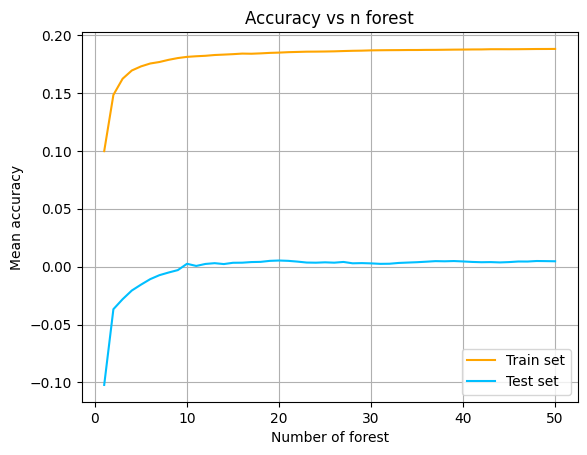

In [107]:
acc_train = []  # Lista para almacenar accuracy
acc_test = []  # Lista para almacenar accuracy

n = 50  # Número de bosques (forest)

for k in range(1, n+1):

    m_rfr = RandomForestRegressor(n_estimators=k,
                                 criterion='poisson',
                                 #max_depth=3,
                                 random_state=42)

    m_rfr.fit(Xs_train, y_train)


    acc_train.append(m_rfr.score(Xs_train, y_train))
    acc_test.append(m_rfr.score(Xs_test, y_test))

plt.plot(range(1, n+1), acc_train, color='orange')
plt.plot(range(1, n+1), acc_test, color='deepskyblue')
plt.xlabel('Number of forest')
plt.ylabel('Mean accuracy')
plt.title('Accuracy vs n forest')
plt.grid(True)
plt.legend(['Train set', 'Test set'])
plt.show()

En todos los criterios el modelo sigue en underfitting, es decir, no es capaz de generalizar. Siempre el accuracy del conjunto de prueba está muy por debajo del conjunto de entrenamiento.

**Random forest no es muy buen modelo** sin embargo, su mejor accuracy se alcanzó con 10 árboles dedecisión.

**MEJOR MODELO DE RANDOM FOREST**

In [108]:
m_rfr = RandomForestRegressor(n_estimators= 10,
                              criterion='absolute_error',
                              #max_depth=4,
                              min_samples_split=5,
                              #min_samples_leaf=70,
                              random_state=42)

# Training
m_rfr.fit(Xs_train, y_train)

# Evaluation
y_pred_rfr = m_rfr.predict(Xs_test)

r2_rfr = round(r2_score(y_test, y_pred_rfr), 2)
mae_rfr = round(mean_absolute_error(y_test, y_pred_rfr), 2)
rmse_rfr = round(np.sqrt(mean_squared_error(y_test, y_pred_rfr)), 2)

print('* R2 score:', r2_rfr)  # 1 is perfect
print('* MAE score:', mae_rfr)  # 0 is perfect
print('* RMSE score:', rmse_rfr)  # 0 is perfect

* R2 score: -0.03
* MAE score: 0.44
* RMSE score: 0.7


#### IV.1.3 K-Nearest Neighbors
---

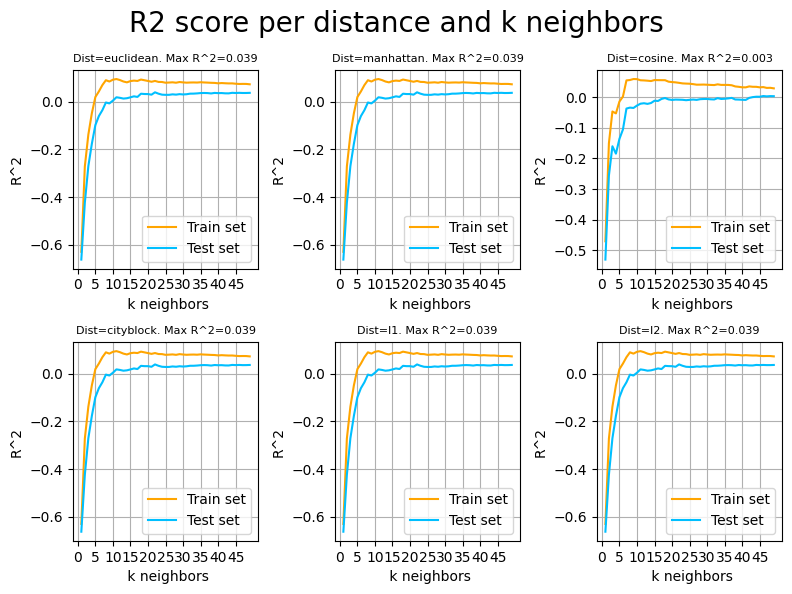

In [109]:
distances = ['euclidean', 'manhattan', 'cosine',
             'cityblock', 'l1', 'l2']
k = 50  # Numbers of neighbors to be tested


plt.subplots(2, 3, figsize=(8, 6))

for idx,dist in enumerate(distances):
  r2_knn_train = [0]  # List of R^2 scores of training set
  r2_knn_test = [0]  # List of R^2 scores of test set

  for i in range(1, k):
      m_knn = KNeighborsRegressor(n_neighbors=i,
                                  weights='uniform',
                                  metric=dist)
      m_knn.fit(Xs_train, y_train)

      r2_knn_train.append(m_knn.score(Xs_train, y_train))
      r2_knn_test.append(m_knn.score(Xs_test, y_test))


  # Plot
  plt.subplot(2, 3, idx+1)

  plt.plot(np.array(range(1, k)), r2_knn_train[1:],
          color='orange');  # Train set
  plt.plot(np.array(range(1, k)), r2_knn_test[1:],
          color='deepskyblue');  # Test set
  plt.xticks(range(0, k, 5))
  plt.xlabel(' k neighbors')
  plt.ylabel('R^2')
  plt.title ('Dist='+ dist+ '. Max R^2=' +\
             str(round(max(r2_knn_test), 3)), fontsize=8)
  plt.grid(True)
  plt.legend(['Train set', 'Test set'])

plt.suptitle('R2 score per distance and k neighbors', fontsize=20)
plt.tight_layout(pad = 1)
plt.show()

La distancia manhattan resultó ser una de las que mayor accuracy alcanzó, con una cantidad de vecinos igual a 2

**MEJOR MODELO DE K-NN**

In [110]:
m_knn = KNeighborsRegressor(n_neighbors=2,
                            weights='uniform',
                            metric='manhattan')
# Training
m_knn.fit(Xs_train, y_train)

# Evaluation
y_pred_knn = m_knn.predict(Xs_test)

r2_knn = round(r2_score(y_test, y_pred_knn), 2)
mae_knn = round(mean_absolute_error(y_test, y_pred_knn), 2)
rmse_knn = round(np.sqrt(mean_squared_error(y_test, y_pred_knn)), 2)

print('* R2 score:', r2_knn)  # 1 is perfect
print('* MAE score:', mae_knn)  # 0 is perfect
print('* RMSE score:', rmse_knn)  # 0 is perfect


* R2 score: -0.42
* MAE score: 0.59
* RMSE score: 0.82


#### IV.1.4 Support Vector Machine (SVM)
---

In [111]:
m_svm = SVR(kernel='linear',
            gamma='scale')

# Entrenamiento
m_svm.fit(Xs_train, y_train)

# Evaluación
y_pred_svm = m_svm.predict(Xs_test)

r2_svm = round(r2_score(y_test, y_pred_svm), 2)
mae_svm = round(mean_absolute_error(y_test, y_pred_svm), 2)
rmse_svm = round(np.sqrt(mean_squared_error(y_test, y_pred_svm)), 2)

print('* R2 score:', r2_svm)  # 1 is perfect
print('* MAE score:', mae_svm)  # 0 is perfect
print('* RMSE score:', rmse_svm)  # 0 is perfect

* R2 score: 0.0
* MAE score: 0.43
* RMSE score: 0.69


In [112]:
m_svm = SVR(kernel='poly',
            degree=4,
            gamma='scale')

# Entrenamiento
m_svm.fit(Xs_train, y_train)

# Evaluación
y_pred_svm = m_svm.predict(Xs_test)

r2_svm = round(r2_score(y_test, y_pred_svm), 2)
mae_svm = round(mean_absolute_error(y_test, y_pred_svm), 2)
rmse_svm = round(np.sqrt(mean_squared_error(y_test, y_pred_svm)), 2)

print('* R2 score:', r2_svm)  # 1 is perfect
print('* MAE score:', mae_svm)  # 0 is perfect
print('* RMSE score:', rmse_svm)  # 0 is perfect

* R2 score: -0.05
* MAE score: 0.46
* RMSE score: 0.71


El mejor modelo utilizando máquina de vectores de soporte fue aquel con el parámetro `kernel` lineal.

Sin embargo, aunque todos los modelos han obtenido muy malos resultados, el mejor modelo hasta la fecha ha sido el de KNN ( K vecinos más cercanos).

#### IV.1.5 Red Neuronal Profunda
---
*Ejecutado en 6 min*

In [113]:

m_dnn = keras.Sequential([
    keras.layers.Dense(2, activation=tf.nn.relu, input_shape=[2]),
    keras.layers.Dense(2, activation=tf.nn.relu),
    #keras.layers.Dense(2, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

m_dnn.compile(loss='mean_absolute_error',
             optimizer=optimizer,
             metrics=['mean_absolute_error', 'mean_squared_error'])

# Ajuste del modelo
m_dnn.fit(Xs_train, y_train, epochs=1000, verbose=2);


Epoch 1/1000
219/219 - 3s - loss: 3.8743 - mean_absolute_error: 3.8743 - mean_squared_error: 15.4449 - 3s/epoch - 14ms/step
Epoch 2/1000
219/219 - 0s - loss: 3.6541 - mean_absolute_error: 3.6541 - mean_squared_error: 13.7878 - 192ms/epoch - 876us/step
Epoch 3/1000
219/219 - 0s - loss: 3.4351 - mean_absolute_error: 3.4351 - mean_squared_error: 12.2336 - 194ms/epoch - 887us/step
Epoch 4/1000
219/219 - 0s - loss: 3.2161 - mean_absolute_error: 3.2161 - mean_squared_error: 10.7768 - 187ms/epoch - 855us/step
Epoch 5/1000
219/219 - 0s - loss: 2.9972 - mean_absolute_error: 2.9972 - mean_squared_error: 9.4154 - 195ms/epoch - 892us/step
Epoch 6/1000
219/219 - 0s - loss: 2.7793 - mean_absolute_error: 2.7793 - mean_squared_error: 8.1527 - 191ms/epoch - 872us/step
Epoch 7/1000
219/219 - 0s - loss: 2.5613 - mean_absolute_error: 2.5613 - mean_squared_error: 6.9823 - 192ms/epoch - 876us/step
Epoch 8/1000
219/219 - 0s - loss: 2.3433 - mean_absolute_error: 2.3433 - mean_squared_error: 5.9101 - 193ms/epo

In [114]:
#m_dnn.predict([[1, 18]]) # Min MSE = 0.4227

Visualización de datos reales y predecidos por el modelo al considerar a las osf que tienen presencia en 3 periodos (1, 2 y 5)

In [115]:
len(osf_3p)

19

1/1 [==============================] - 0s 43ms/step


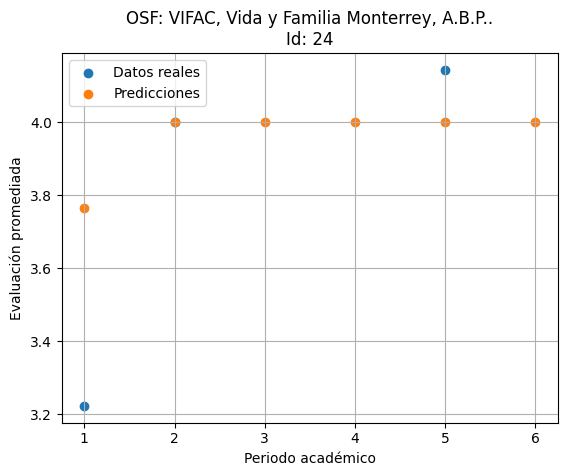

In [116]:

n = 6  # Número de osf que tiene presencia en 3 periodos (0 a 18) 7, 12
plt.scatter(x = [1, 2, 5], y=df_models[df_models.osf==idOsf(osf_3p[n])].groupby('periodoA').mean().evaluacion, label='Datos reales')

plt.scatter(x = [1, 2, 3, 4, 5, 6], y = [m_dnn.predict([[x, idOsf(osf_3p[n])]]) for x in range(1, 7)], label='Predicciones');
plt.title(f'OSF: {osf_3p[n]}.\nId: {idOsf(osf_3p[n])}')
plt.grid()
plt.legend()
plt.xlabel('Periodo académico')
plt.ylabel('Evaluación promediada')
plt.show()


**Guardamos el modelo entrenado y lo recosntruimos**

In [117]:
#m_dnn.save('model_dnn')

INFO:tensorflow:Assets written to: model_dnn\assets


INFO:tensorflow:Assets written to: model_dnn\assets


In [118]:
#m_dnn_reconstructed = keras.models.load_model('model_dnn')

In [119]:
#m_dnn_reconstructed.predict([[1, 24]])

1/1 [==============================] - 0s 72ms/step


array([[3.765341]], dtype=float32)

**Crear archivo pickle usando serialización**

In [ ]:
pickle_out = open('m_dnn.pkl', 'wb')
pickle.dump(m_dnn, pickle_out)


### IV.2 Modelos de aprendizaje no supervisado para generar nueva información

Se utilzarán modelos de aprendizaje no supervisado para las siguientes tareas:

* Identificar las variables más relevantes: Análisis de componentes principales (PCA)
* Identificar si los mejors osf tienen algo en común: K-Means y Clusterización

Uniendo datos escalados para alimentar a modelos de aprendizaje no supervisado

#### IV.2.1 Análisis de Componentes Principales (PCA)

In [120]:
Xns = df_coment.drop(['categoria', 'comentarios'], axis=1).copy()
Xns.osf = Xns.osf.apply(idOsf)  # Cambiamos a entero la variable categorica de la osf
Xns.dropna(axis=0, inplace=True)  # Eliminamos valores nulos de columna osf

# Escalamiento
scalerNs=MinMaxScaler()
scalerNs.fit(Xns)
Xns=scalerNs.transform(Xns)
Xns=pd.DataFrame(Xns,columns=df_coment.drop(['categoria', 'comentarios'], axis=1).columns)

In [121]:
c = 10  # Número de componentes
pca = PCA(n_components = c)
pca.fit(Xns)

#  Porcentaje de varianza (info) contenida en cada componente
pca.explained_variance_ratio_

array([0.32038447, 0.14439605, 0.13206429, 0.11790477, 0.08984575,
       0.06860543, 0.03272471, 0.01738236, 0.01416023, 0.01372395])

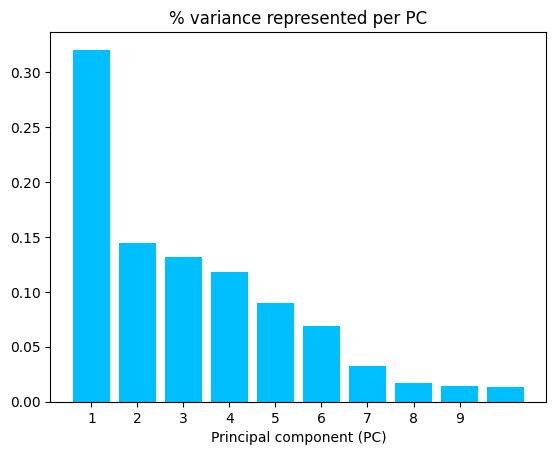

In [122]:
# Visualisación
plt.bar(np.array(range(c))+1, pca.explained_variance_ratio_, color='deepskyblue')
plt.title("% variance represented per PC")
plt.xlabel("Principal component (PC)")
plt.xticks(range(1,c))
plt.show()

In [123]:
pca.explained_variance_ratio_[:5].sum()

0.8045953286830267

Con las primeras 5 componentes logramos contener a más del 80% de los datos. Además, la primera componente parece contener significativamente más varianza que el resto

##### Identificar las variables mas relevantes

In [124]:
# Data frame of first principal component eigenvalues
df_pc1_cmpnts = pd.DataFrame(np.abs(pca.components_[0]),
                             index=Xns.columns)

df_pc1_cmpnts.sort_values(by=0, ascending=False).head(10)

,0
p6.1,0.608104
p2,0.325295
p1_h,0.275056
p1_g,0.268480
evaluacion,0.240416
p1_e,0.239106
p1_i,0.230013
p1_a,0.226007
p4,0.201610
p1_b,0.197256


En la primera componente, la pregunta 6.1 parece contener significativamente más varianza que el resto de preguntas.

Por lo que parece indicar que es una variable a considerar.

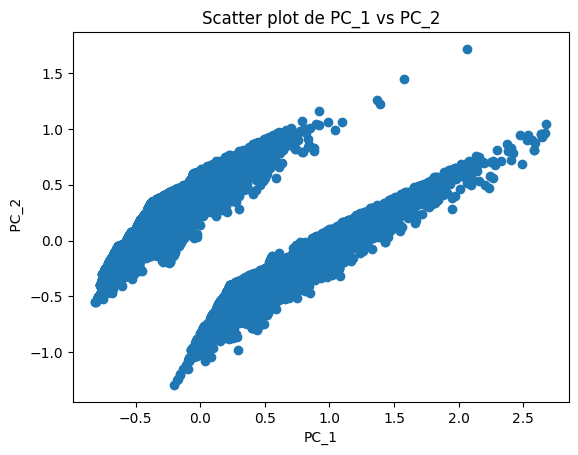

In [125]:
X_pca = pca.transform(Xns).copy()
comp_1=1
comp_2=2
plt.scatter(X_pca[:,(comp_1-1)],X_pca[:,(comp_2-1)])
plt.title("Scatter plot de PC_" + str(comp_1) + " vs PC_" + str(comp_2))
plt.xlabel("PC_"+str(comp_1))
plt.ylabel(" PC_"+str(comp_2))
plt.show()

#### IV.2.2 K Means

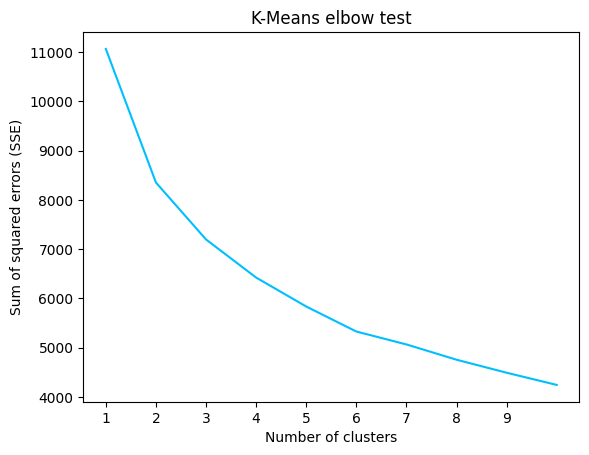

In [126]:
sse = []  # Lista de sum of squared errors
n = 10  # Número de clusters a ser probados para elegir el mejor

for i in range(n):
    kmeans= KMeans(init='random',
                   n_init=5,
                   n_clusters=i+1,
                   random_state=42)

    kmeans.fit(Xns)
    sse.append(kmeans.inertia_)

plt.plot(np.array(range(n))+1,sse, color='deepskyblue');
plt.xticks(range(1,n))
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors (SSE)')
plt.title ('K-Means elbow test')
plt.show()

De acuerdo con la técnica del codo, la mejor elección es generar **4 clusters**

Creamos el modelo para 4 cluster

In [127]:
k=4
m_km=KMeans(n_clusters=k, random_state=42)
m_km.fit(Xns)
Xns["cluster_kmeans"]=m_km.predict(Xns)
Xns.cluster_kmeans.value_counts()

cluster_kmeans
2    3479
0    2805
1    2509
3    1201
Name: count, dtype: int64

#### IV.2.3 Clusterización

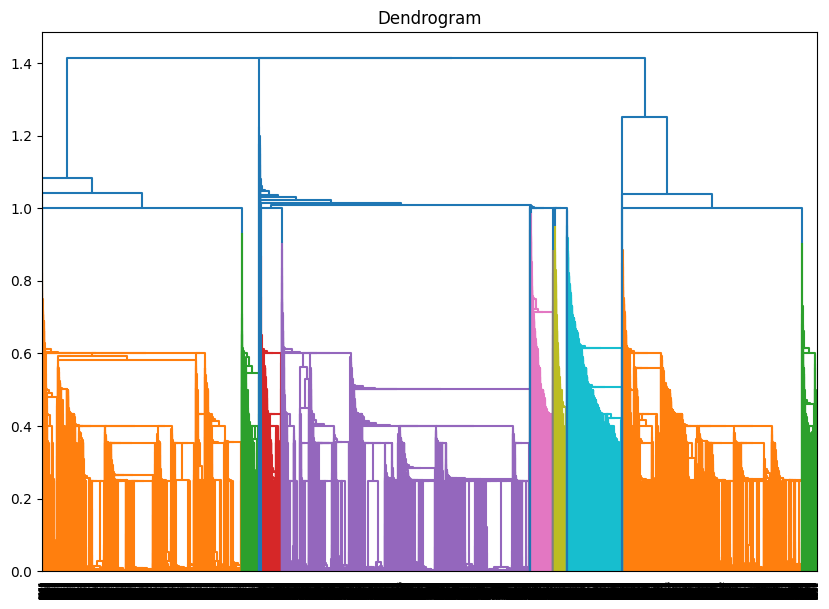

In [128]:
# record start time
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(Xns))

El dendrograma también nos indica la presencia de **4 clusters**.

Creamos el modelos para 4 clusters.

In [129]:
m_ac = AgglomerativeClustering(n_clusters=4)
m_ac.fit(Xns)
Xns["ac_cluster"] = m_ac.fit_predict(Xns)
Xns["ac_cluster"].value_counts()

ac_cluster
0    3479
1    2805
3    2509
2    1201
Name: count, dtype: int64

Tanto k means como el clustering aglomerativo nos arrojan la misma cantidad de datos para cada cluster.

Veamos qué tienen en común cada uno.

In [130]:
Xns.head(3)

,periodoA,osf,p1_a,p1_b,p1_e,p1_g,p1_h,p1_i,p2,p4,p5_a,p5_b,p5_c,p5_e,p6,p6.1,evaluacion,cluster_kmeans,ac_cluster
0,0.0,0.000000,0.75,1.00,1.00,1.00,1.00,1.00,1.0,0.0,0.75,1.00,1.00,1.00,0.0,1.0,0.75,2,0
1,0.0,0.001443,0.75,0.75,0.75,0.75,0.75,0.00,1.0,0.0,0.75,0.75,0.75,0.75,0.0,1.0,0.50,2,0
2,0.0,0.002886,0.75,1.00,1.00,1.00,1.00,0.75,1.0,0.0,1.00,1.00,1.00,1.00,0.0,0.0,0.75,1,3


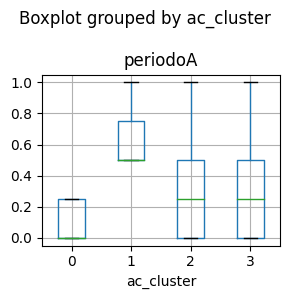

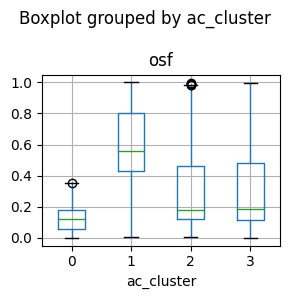

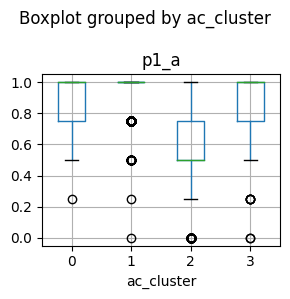

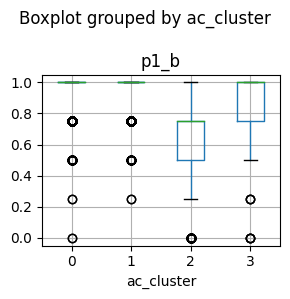

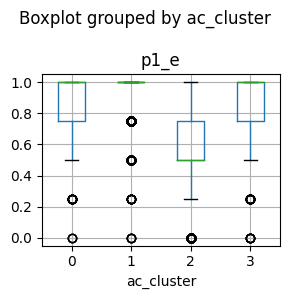

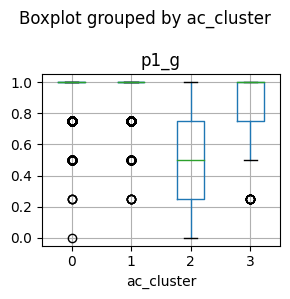

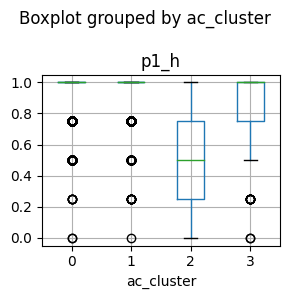

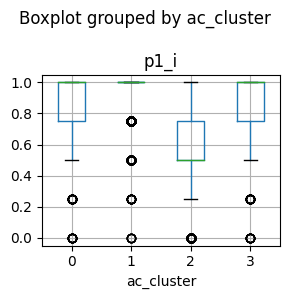

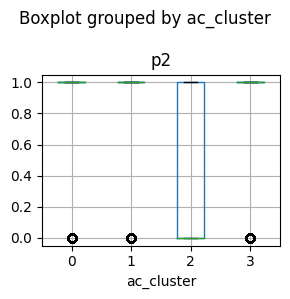

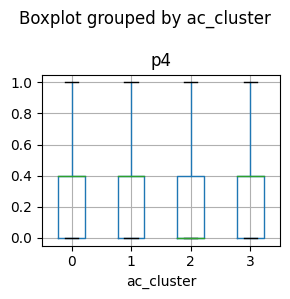

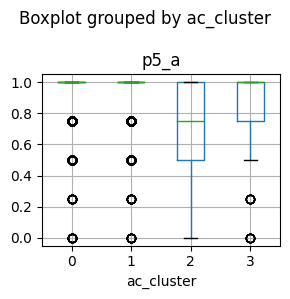

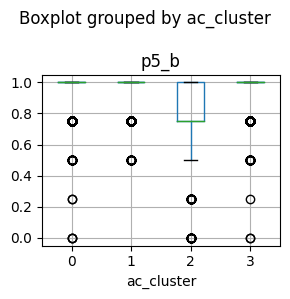

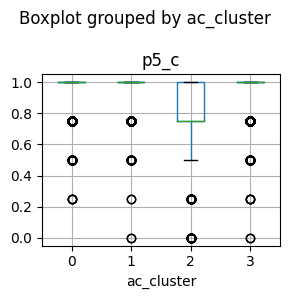

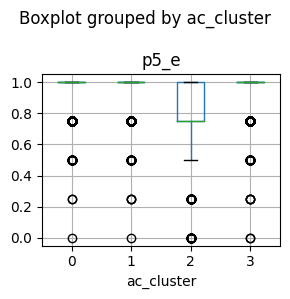

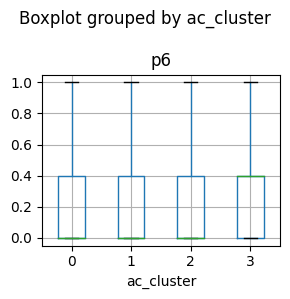

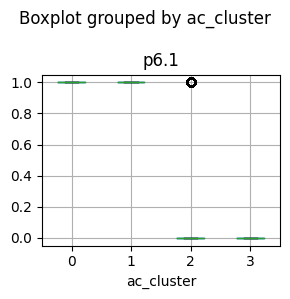

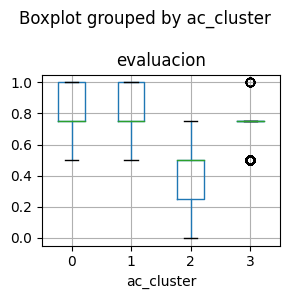

In [131]:
for i in Xns.columns[:-2]:
    Xns.boxplot(column=[i],by="ac_cluster",figsize=(3,3))
    plt.tight_layout()
    plt.show()

Se observa lo siguiente respecto a los puntajes en cada cluster:

* C0: Más bajos puntajes y alta varianza
* C1: Altos
* C2: Bajos
* C3: Más altos puntajes y con menor varianza



Veamos quienes son las categorías con osf con más altos puntajes

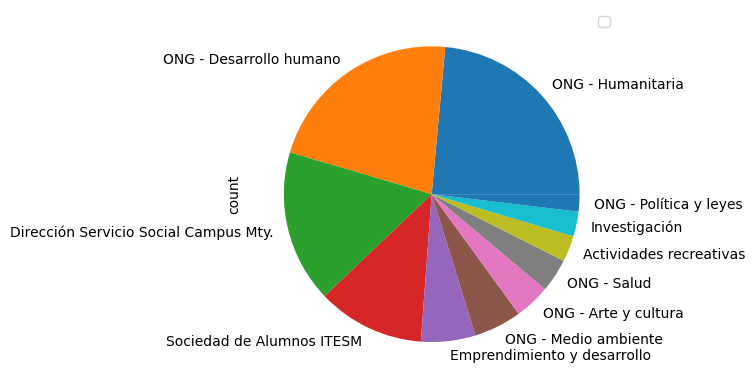

In [148]:
#pd.DataFrame(df_coment.iloc[Xns[Xns.ac_cluster == 3].index, :].categoria.value_counts()).plot.pie(subplots=True)
pd.DataFrame(df_coment.iloc[Xns[Xns.ac_cluster == 3].index, :].categoria.value_counts()).plot.pie(subplots=True)
plt.legend([], [])
plt.show()

---
## TESTS

In [149]:
# Convertir Data Frame a archivo excel
#pip install xlsxwriter
#df_coment.to_excel('DB.xlsx', engine='xlsxwriter')
#df_coment.to_csv('DataBase.csv', index=False)